In [60]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('gender_submission.csv')

In [62]:
df_train = df_train.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)
df_test = df_test.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)

In [63]:
col = ['SibSp',	'Parch', 'Age', 'Fare']
for i in col:
    df_train[i].fillna(df_train[i].median(), inplace=True)

/var/folders/wz/8vss2jv11557bnmhvs6t1rtm0000gn/T/ipykernel_25531/1177722657.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[i].fillna(df_train[i].median(), inplace=True)
/var/folders/wz/8vss2jv11557bnmhvs6t1rtm0000gn/T/ipykernel_25531/1177722657.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [64]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

In [65]:
# df_train['Embarked'].value_counts()

In [66]:
label = LabelEncoder()

for i in df_train.columns:
    if df_train[i].dtype == object:
        df_train[i] = label.fit_transform(df_train[i])

for i in df_test.columns:
    if df_test[i].dtype == object:
        df_test[i] = label.fit_transform(df_test[i])

In [67]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [68]:
# X.isna().sum()a

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
model = LogisticRegression()

In [12]:
param = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'dual': [False, True],
    'solver': ['liblinear', 'lbfgs']
}

In [13]:
fool_model = GridSearchCV(model, param_grid=param, cv=3, verbose=2)

In [14]:
fool_model.fit(X, y)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END ..C=0.001, dual=False, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.001, dual=False, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.001, dual=False, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.001, dual=False, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.001, dual=False, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.001, dual=False, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.001, dual=False, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.001, dual=False, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.001, dual=False, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=0.001, dual=False, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.001, dual=False, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.001, dual=False, penalty=l2,

/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

[CV] END ......C=1, dual=False, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, dual=False, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, dual=False, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, dual=False, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, dual=False, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, dual=False, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, dual=False, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=1, dual=False, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=1, dual=False, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, dual=False, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, dual=False, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, dual=False, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1, dual=False, pe

/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---------------------------------------

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'dual': [False, True],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=2)

In [15]:
y_pred = fool_model.predict(X_test)

In [18]:
fool_model.best_params_

{'C': 1, 'dual': False, 'penalty': 'l2', 'solver': 'liblinear'}

In [19]:
df_sub.to_csv('Titanic_Logistic.csv', index=False, index_label=False)

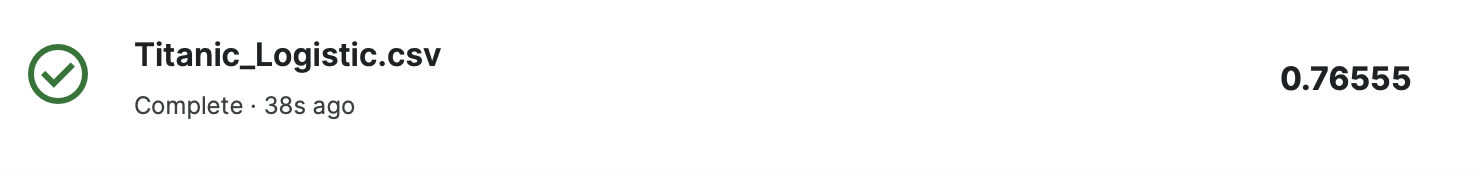

### Logistic -> 0.76555
### DecisionTreeClassifier -> 0.74162

In [31]:
model = DecisionTreeClassifier()

In [32]:
param = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [33]:
fool_model = GridSearchCV(model, param_grid=param, cv=2, verbose=2)

In [34]:
fool_model.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [35]:
y_pred = fool_model.predict(df_test)

In [36]:
df_sub['Survived'] = y_pred

In [37]:
df_sub.to_csv('Titanic_DecisionTree.csv', index=False, index_label=False)

In [38]:
fool_model.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10}

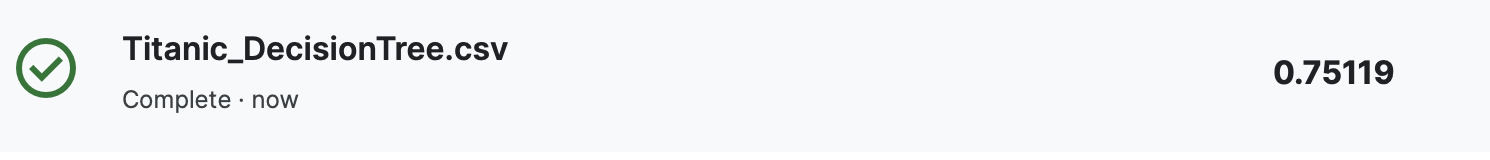

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model = RandomForestClassifier()

In [72]:
param = {
    'n_estimators': [6, 9, 11],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [73]:
fool_model = GridSearchCV(model, param_grid=param, cv=2, verbose=2)

In [74]:
fool_model.fit(X, y)

Fitting 2 folds for each of 243 candidates, totalling 486 fits
[CV] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6; total time=   0.0s
[CV] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=6; total time=   0.0s
[CV] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9; total time=   0.0s
[CV] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=9; total time=   0.0s
[CV] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=11; total time=   0.0s
[CV] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=11; total time=   0.0s
[CV] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=6; total time=   0.0s
[CV] END criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimato

/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
162 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/dayana/Desktop/Jupyter/Prog/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [6, 9, 11]},
             verbose=2)

In [75]:
y_pred = fool_model.predict(X_test)

In [77]:
fool_model.best_params_

{'criterion': 'log_loss',
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 9}

In [79]:
df_sub.to_csv('Titanic_RandomForestClassifier.csv', index=False, index_label=False)

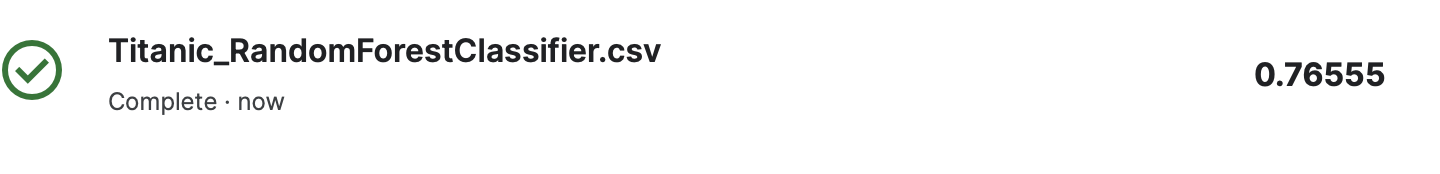